# TMA4135 Exercise 8:
### Author: Simen Kristiansen Sandhaug 
---

## Table of Contents
- [Problem 2](#problem-2-bvp)
  - [2c](#2d)
---

# Problem 2 BVP
## 2d)

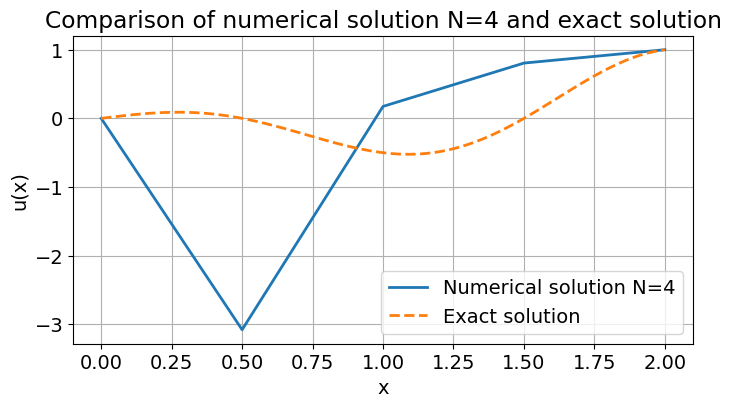

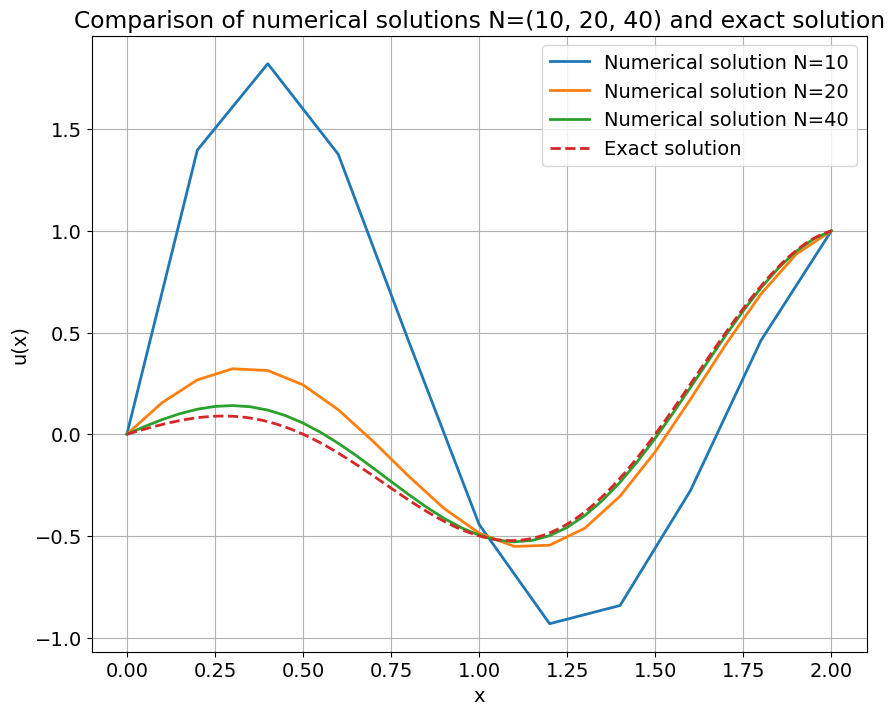

For N = 10, the maximum error e(h) is 1.7597183536360117
For N = 20, the maximum error e(h) is 0.25126030678849975
The ratio between the errors for N = 20 and N = 10 is 0.14278438721135917
For N = 40, the maximum error e(h) is 0.05668858779756575
The ratio between the errors for N = 40 and N = 20 is 0.2256169648208055
For N = 80, the maximum error e(h) is 0.013847108057335751
The ratio between the errors for N = 80 and N = 40 is 0.24426623762058783
For N = 160, the maximum error e(h) is 0.00344246081676583
The ratio between the errors for N = 160 and N = 80 is 0.24860503742094547
For N = 320, the maximum error e(h) is 0.0008593750316925677
The ratio between the errors for N = 320 and N = 160 is 0.24963974245026996


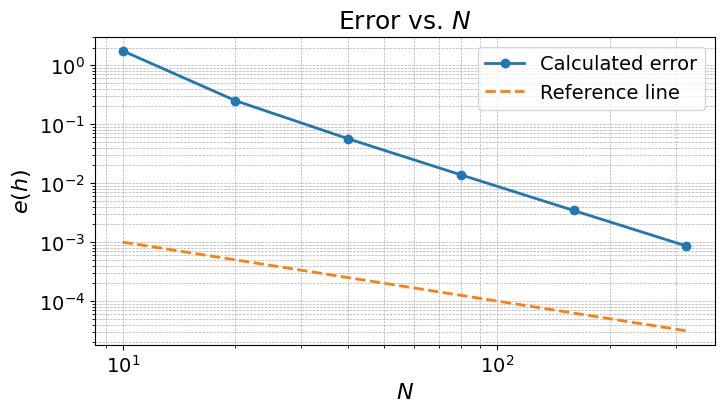

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

def tridiag(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = v*np.diag(e[1:],-1)+d*np.diag(e)+w*np.diag(e[1:],1)
    return A

class BVP(object): 
    def __init__(self, f, g0=0, g1=1, a=0, b=2):
        self.f = f  # forcing function
        self.g0 = g0 # Dirichlet value in a
        self.g1 = g1 # Dirichlet value in b
        self.a = a # beginning of the interval
        self.b = b # end of the interval

def solve_bvp(bvp, N=10):
    x = np.linspace(bvp.a, bvp.b, N+1)  # grid points
    dx = (bvp.b - bvp.a) / N  # step size
    xi = x[1:-1]  # inner grid points

    # Define the tridiagonal matrix A
    v = 1 / dx ** 2 - 1 / dx
    d = -2 / dx ** 2 + np.pi ** 2
    w = 1 / dx ** 2 + 1 / dx
    A = tridiag(v, d, w, N - 1)

    # Define the right-hand side f
    fi = bvp.f(xi)
    fi[0] -= bvp.g0 * v # Adjust for Dirichlet condition
    fi[-1] -= bvp.g1 * w # Adjust for Dirichlet condition

    # Solve the system of linear equations Au = f
    Ui = np.linalg.solve(A, fi)

    # Include the boundary conditions
    U = np.zeros(N + 1)
    U[0] = bvp.g0  # left boundary value
    U[1:-1] = Ui  # the solution of the system
    U[-1] = bvp.g1  # right boundary value

    return x, U


def u(x):
    return (x / 2) * np.cos(np.pi * x)

def f(x):
    return np.cos(np.pi * x) - np.pi * (x + 1) * np.sin(np.pi * x)

# Function to calculate the maximum error
def calculate_error(U, x):
    exact_values = u(x)
    return np.max(np.abs(U - exact_values))


# Create our specific case
ex1 = BVP(f, g0=u(0), g1=u(2), a=0, b=2)

# Solve problem and plot
x, U = solve_bvp(ex1, N=4)
plt.plot(x, U, label='Numerical solution N=4')
plt.plot(np.linspace(0,2,100), u(np.linspace(0,2,100)), label='Exact solution', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparison of numerical solution N=4 and exact solution')
plt.show()

plt.figure(figsize=(10, 8))
for N in [10, 20, 40]:
    x, U = solve_bvp(ex1, N=N)
    plt.plot(x, U, label='Numerical solution N={}'.format(N))
    
plt.plot(np.linspace(0,2,100), u(np.linspace(0,2,100)), label='Exact solution', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparison of numerical solutions N=(10, 20, 40) and exact solution')
plt.show()


# List to store errors for different N
errors = []
Ns = [10, 20, 40, 80, 160, 320]

for i, N in enumerate(Ns):
    x, U = solve_bvp(ex1, N=N)  
    error = calculate_error(U, x)
    errors.append(error)
    print(f"For N = {N}, the maximum error e(h) is {error}")
    if i > 0 and i < len(Ns):
        print(f"The ratio between the errors for N = {N} and N = {Ns[i-1]} is {error / errors[i-1]}")

# Plotting the errors
plt.figure()
plt.loglog(Ns, errors, marker='o', linestyle='-', linewidth=2, markersize=6, label='Calculated error')

plt.loglog(Ns, [1e-2 / N for N in Ns], linestyle='--', label='Reference line')

plt.xlabel('$N$', fontsize=16)
plt.ylabel('$e(h)$', fontsize=16)
plt.title('Error vs. $N$', fontsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

#### The ratio $\frac{e_{i+1}}{e_i}$ seems to be approaching $\frac{1}{4}$ as N tends to $\infty$. This is what one would expect of a method of second order convergence, hence we can conclude that the method is second-order accurate, i.e, that it is $\mathcal{O}(h^2)$.